# Exercise 3

Importing essencial libraries and reading the Les Miserables network:

In [1]:
import networkx as nx
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import random as rng

G = nx.read_gml('lesmis.gml')

Plotting the network and its adjacency matrix:

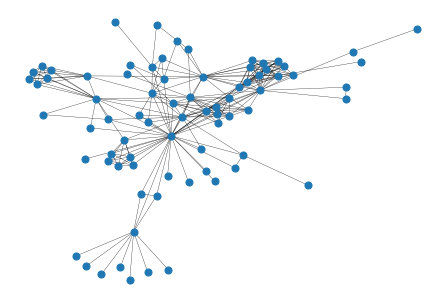

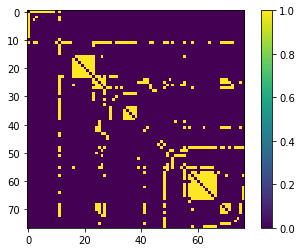

In [2]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size = 50, with_labels=False, width=0.3)
plt.show()

M = nx.to_numpy_matrix(G)
plt.imshow(M)
plt.colorbar()
plt.show()

As the random walk we want to simulate in this network is a Markov Chain, we need to create a function that gives us the probability transition matrix of a network:

In [3]:
def transitionMatrix(G):
    M = nx.to_numpy_matrix(G)
    A = np.sum(M, axis = 0) #axis = 1 => sums the rows
    D = np.diagflat(A)
    D = np.linalg.inv(D)
    T = np.dot(D, M)
    return T

Defining the random walk function:

In [4]:
#returns the number of times each node is visited and the order they were visited
# number, order = randomWalk(G,steps)
def randomWalk(G, steps):
    T = transitionMatrix(G)#getting the transition matrix
    
    size = T.shape[0]#getting the matrix dimension 
    node = rng.randint(0,size-1)#selecting the starting node
    visited = list()#visit of nodes visited
    vcount = np.zeros(size)#array in which the element vcount[x] is the number of times
                           # that the random walk stepped in x

    for loop in range(steps):
        sum = 0.0
        r = rng.uniform(0,1) #get a random number between 0 and 1
        visited.append(node) #add the current node to the list
        vcount[node] = vcount[node] + 1 #sums the counter of the node
        for col in range(size):
            sum = sum + T[node, col] #sums the probabilities of changing to the 
                                     #node 'col' from the current node
            if(sum > r): #if the random number is between sum(p(0),p(n)) and sum(p(0),p(n+1)),
                         #the node n+1 is selected to be the next in the walk
                node = col
                break
                
    return vcount, visited

Now we're gonna simulate a randomWalk of 10000 steps, generate its step distribution, and compare it with the networks degree distribution.

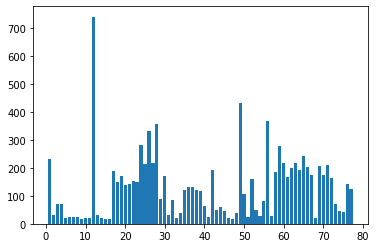

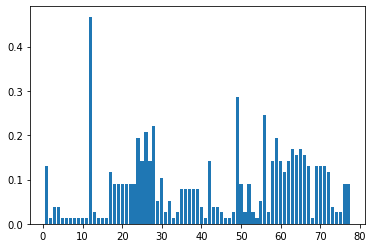

In [5]:
vcount,order = randomWalk(G, 10000)
size = vcount.shape[0]

x = np.array(range(size)) + 1

plt.bar(x,vcount)
plt.show()


M = nx.to_numpy_matrix(G)
Degree = np.array(np.sum(M, axis = 0))
Degree = Degree/size
Degree = np.reshape(Degree,(size,))

plt.bar(x, Degree)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()